In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression

%matplotlib notebook

In [3]:
# brute : GTX 1070
t_1024 = [0.627, 0.244, 0.264, 0.254, 0.280]
t_4096 = [7.763, 2.103, 0.852, 0.865, 1.091]
t_16384 = [122.138, 31.028, 11.458, 8.626, 9.544]
t_65536 = [2034.802, 499.169, 181.769, 135.122, 149.830]

nbthreads = [256, 1024, 4096, 16384, 65535]

In [4]:
def power(my_list):
    return [ 10**x for x in my_list ]

In [5]:
#reg_1024 = LinearRegression().fit(np.array(nbthreads).reshape(-1,1), t_1024)
#reg_4096 = LinearRegression().fit(np.array(nbthreads).reshape(-1,1), t_4096)
#reg_16384 = LinearRegression().fit(np.array(nbthreads).reshape(-1,1), t_16384)
#reg_65536 = LinearRegression().fit(np.array(nbthreads).reshape(-1,1), t_65536)

reg_1024 = LinearRegression().fit(np.log10(np.array(nbthreads).reshape(-1,1)), np.log10(t_1024))
reg_4096 = LinearRegression().fit(np.log10(np.array(nbthreads).reshape(-1,1)), np.log10(t_4096))
reg_16384 = LinearRegression().fit(np.log10(np.array(nbthreads).reshape(-1,1)), np.log10(t_16384))
reg_65536 = LinearRegression().fit(np.log10(np.array(nbthreads).reshape(-1,1)), np.log10(t_65536))

<IPython.core.display.Javascript object>


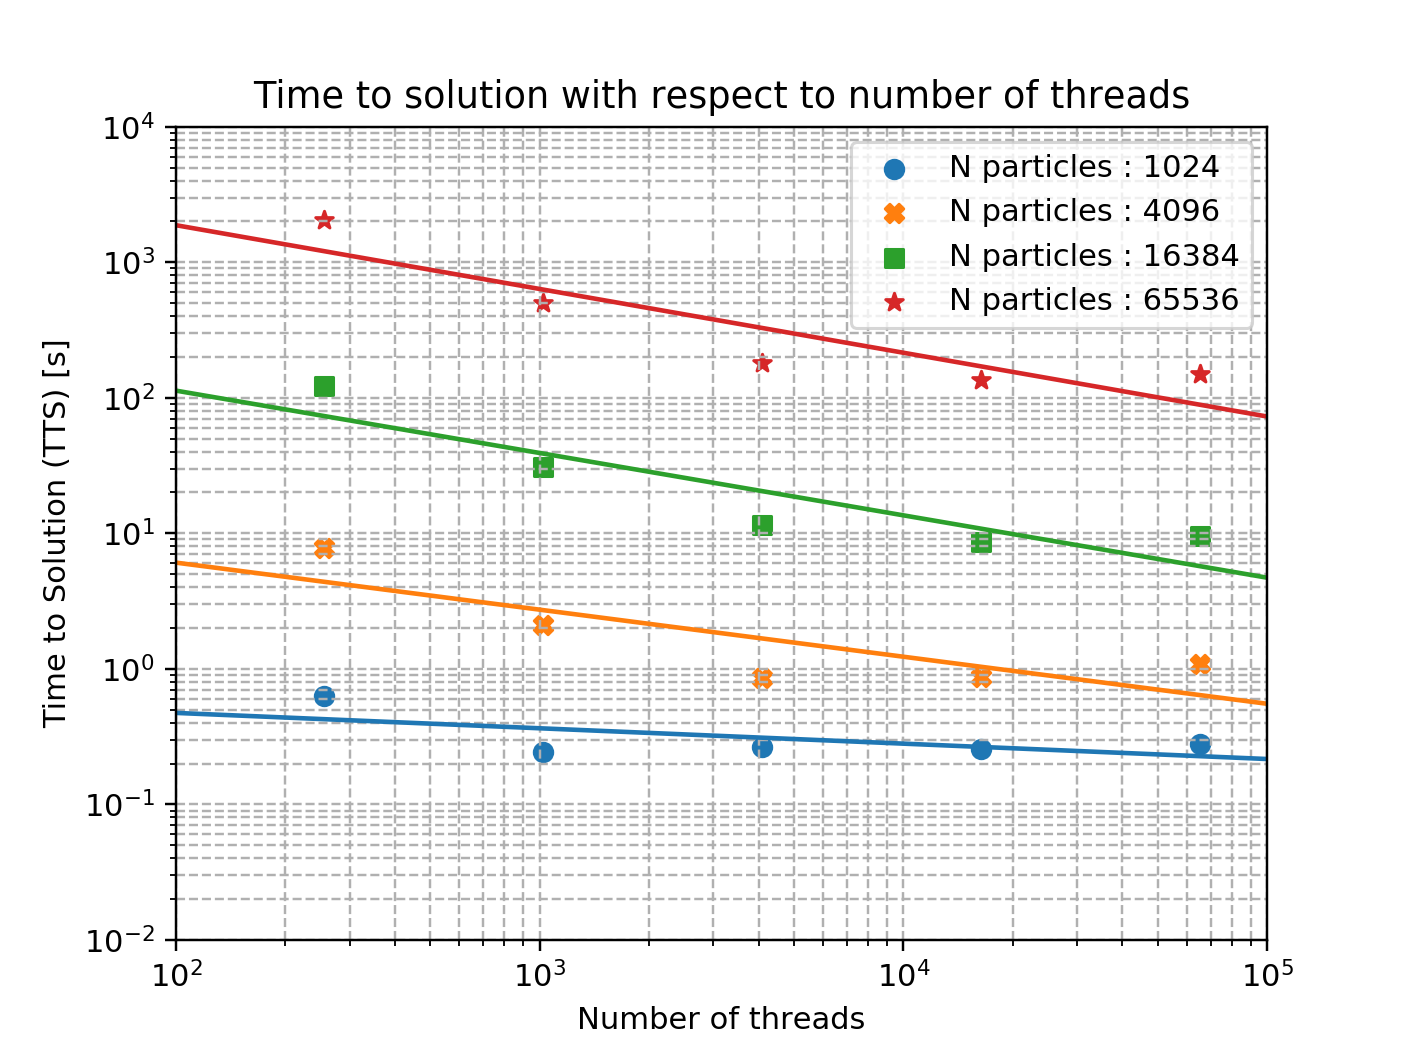

In [7]:
fig = plt.figure()
xp = np.logspace(2,5,100)

plt.scatter(nbthreads, t_1024, label='N particles : 1024', marker='o')
plt.scatter(nbthreads, t_4096, label='N particles : 4096', marker='X')
plt.scatter(nbthreads, t_16384, label='N particles : 16384', marker='s')
plt.scatter(nbthreads, t_65536, label='N particles : 65536', marker='*')

plt.plot(xp, power(reg_1024.coef_[0]*np.log10(xp) + reg_1024.intercept_), '-')
plt.plot(xp, power(reg_4096.coef_[0]*np.log10(xp) + reg_4096.intercept_), '-')
plt.plot(xp, power(reg_16384.coef_[0]*np.log10(xp) + reg_16384.intercept_), '-')
plt.plot(xp, power(reg_65536.coef_[0]*np.log10(xp) + reg_65536.intercept_), '-')

plt.legend()
plt.ylim( (10**-2,10**4) )
plt.xlim( (10**2,10**5) )
plt.grid(True, which="both",linestyle='--')

plt.yscale('log')
plt.xscale('log')

plt.title('Time to solution with respect to number of threads')
plt.xlabel('Number of threads')
plt.ylabel('Time to Solution (TTS) [s]')
plt.show()